In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    quandl_stock_data,
    optimize_portfolio,
    closing_prices,
)

%matplotlib notebook

In [2]:
stock_selection = [
    "AMZN",
    "PFE",
    "AMD",
    "HAL",
    "PG",
    "COF",    
]

stock_selection

['AMZN', 'PFE', 'AMD', 'HAL', 'PG', 'COF']

In [3]:
portfolio = optimize_portfolio(assets=stock_selection)
portfolio

[1] Retrieving Stock Data: PFE
[2] Retrieving Stock Data: AMD
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: PG
[5] Retrieving Stock Data: COF

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMD         0.2076
AMZN        0.4901
COF         0.1258
HAL         0.0098
PFE         0.0473
PG          0.1193
Return      0.2042
Sharpe      0.4737
Variance    0.2242
Name: 1347, dtype: float64


{'AMD': 0.2076,
 'AMZN': 0.4901,
 'COF': 0.1258,
 'HAL': 0.0098,
 'PFE': 0.0473,
 'PG': 0.1193,
 'Return': 0.2042,
 'Sharpe': 0.4737,
 'Variance': 0.2242}

In [4]:
def backtest_portfolio_performance(pfolio):
    exclude = ["Return", "Sharpe", "Variance"]
    assets = [(a,wt) for a, wt in pfolio.items() if a not in exclude]
    
    # Initialize Portfolio Back-Test Performance DataFrame
    back_test = closing_prices(assets[0][0]).set_index("Date")
    back_test = np.log(back_test / back_test.shift(1)).iloc[1:]
    back_test = back_test.apply(lambda x: x * assets[0][1])
    
    for allocation in assets[1:]:
        stock = allocation[0]
        weight = allocation[1]
        print(f'\nTicker: {stock} \tPortfolio Weight: {weight}')
        
        closing_data = closing_prices(stock).set_index("Date")
        pct_return = np.log(closing_data / closing_data.shift(1)).iloc[1:]
        pct_return = pct_return.apply(lambda x: x * weight)
        back_test = pd.merge(back_test, pct_return, on="Date", how="inner")
        print(pct_return.head())
        
    back_test["RTNp"] = back_test.sum(axis=1)
    print("\n[Historic] Portfolio Performance:\n", back_test.head())
    
    return back_test

In [5]:
historic_perform = backtest_portfolio_performance(pfolio=portfolio)


Ticker: AMZN 	Portfolio Weight: 0.4901
                AMZN
Date                
2014-01-03 -0.001888
2014-01-06 -0.003486
2014-01-07  0.005448
2014-01-08  0.004767
2014-01-09 -0.001111

Ticker: COF 	Portfolio Weight: 0.1258
                 COF
Date                
2014-01-03  0.000146
2014-01-06 -0.001226
2014-01-07  0.001128
2014-01-08  0.000924
2014-01-09  0.000000

Ticker: HAL 	Portfolio Weight: 0.0098
                 HAL
Date                
2014-01-03  0.000023
2014-01-06  0.000037
2014-01-07 -0.000023
2014-01-08 -0.000138
2014-01-09  0.000022

Ticker: PFE 	Portfolio Weight: 0.0473
                 PFE
Date                
2014-01-03  0.000093
2014-01-06  0.000046
2014-01-07  0.000293
2014-01-08  0.000322
2014-01-09 -0.000031

Ticker: PG 	Portfolio Weight: 0.1193
                  PG
Date                
2014-01-03 -0.000133
2014-01-06  0.000281
2014-01-07  0.001148
2014-01-08 -0.001742
2014-01-09  0.000267

[Historic] Portfolio Performance:
                  AMD      AMZN    

In [6]:
historic_perform.head(10)

,AMD,AMZN,COF,HAL,PFE,PG,RTNp
Date,,,,,,,
2014-01-03,0.002611,-0.001888,0.000146,0.000023,0.000093,-0.000133,0.000853
2014-01-06,0.006640,-0.003486,-0.001226,0.000037,0.000046,0.000281,0.002293
2014-01-07,0.002498,0.005448,0.001128,-0.000023,0.000293,0.001148,0.010493
2014-01-08,0.000000,0.004767,0.000924,-0.000138,0.000322,-0.001742,0.004134
2014-01-09,-0.004519,-0.001111,0.000000,0.000022,-0.000031,0.000267,-0.005371
2014-01-10,0.004021,-0.004111,0.000274,0.000178,-0.000368,-0.000178,-0.000184
2014-01-13,-0.002001,-0.008303,-0.002689,-0.000184,-0.000232,-0.000432,-0.013840
2014-01-14,0.008374,0.008155,0.001620,0.000161,0.000707,0.001275,0.020293
2014-01-15,0.008049,-0.002063,-0.000538,0.000047,0.000274,-0.000118,0.005651


In [7]:
historic_perform.describe()

,AMD,AMZN,COF,HAL,PFE,PG,RTNp
count,1063.000000,1063.000000,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,0.000177,0.000611,0.000022,-4.765236e-07,0.000007,-0.000005,0.000811
std,0.007822,0.009093,0.001879,1.917990e-04,0.000521,0.001042,0.014181
min,-0.057926,-0.057098,-0.017694,-1.126367e-03,-0.002575,-0.004878,-0.064500
25%,-0.003480,-0.003389,-0.000937,-1.019400e-04,-0.000251,-0.000530,-0.006390
50%,0.000000,0.000544,0.000034,-2.228032e-06,0.000000,-0.000014,0.001545
75%,0.003582,0.005062,0.001014,1.124831e-04,0.000256,0.000541,0.008498
max,0.087320,0.064780,0.010326,1.030687e-03,0.003230,0.004346,0.080873


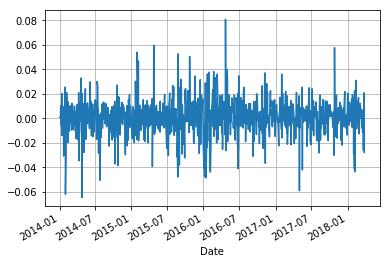

In [8]:
historic_perform["RTNp"].plot()
plt.grid(True)
plt.show()

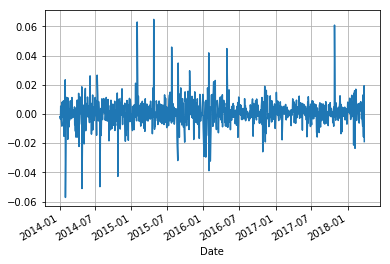

In [9]:
historic_perform["AMZN"].plot()
plt.grid(True)